In [1]:
from src.utils import (
    load_complex_array_from_binary,
    elastic_load_signal_trends_path,
    harmonic_load_signal_trends_path,
)

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=elastic_load_signal_trends_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=harmonic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("harmonic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)


initial: -1.396924106411418 -0.2951280330774596 -0.009185891899289061
harmonic: -1.6537449496621162 -0.37316201894317813 0.08609754036014658


initial: -1.396924106411418 -0.2951280330774596 -0.009185891899289061
harmonic: -1.8647204146191998 -0.417975122758098 0.09506008353914047


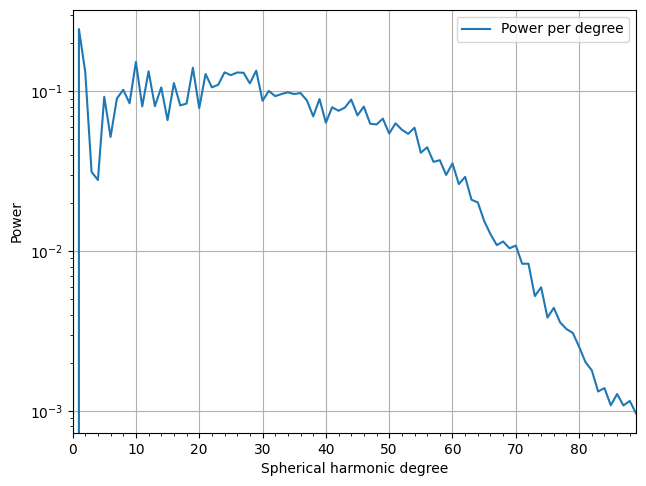

In [2]:
from src.utils import (
    load_complex_array_from_binary,
    elastic_load_signal_trends_path,
    harmonic_load_signal_trends_path,
)
from pyshtools import SHCoeffs

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=elastic_load_signal_trends_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="2", path=harmonic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("harmonic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)

from numpy import round
clm = SHCoeffs.from_array(
    coeffs=round(computed_elastic_load_signal_trends - elastic_load_signal_trends, 6)
)
fig, ax = clm.plot_spectrum(show=False)

In [3]:
from src.utils import (
    compute_harmonic_signal_trends,
    get_ocean_mask,
    redefine_n_max,
    build_frequencial_harmonic_elastic_load_signal,
)
from src.utils.classes import load_load_signal_hyper_parameters
from src.functions import mean_on_mask

load_signal_hyper_parameters = load_load_signal_hyper_parameters()
(
    dates,
    frequencies,
    frequencial_harmonic_elastic_load_signal,
) = build_frequencial_harmonic_elastic_load_signal(
    load_signal_hyper_parameters=load_signal_hyper_parameters
)

ocean_mask = get_ocean_mask(
    name=load_signal_hyper_parameters.ocean_mask,
    n_max=redefine_n_max(
        n_max=load_signal_hyper_parameters.n_max,
        harmonics=frequencial_harmonic_elastic_load_signal,
    ),
)

frequencial_harmonic_elastic_load_signal[:, :2 ,:, :] = 0.0

mean_on_mask(
    mask=ocean_mask,
    harmonics=compute_harmonic_signal_trends(
        signal_dates=dates,
        load_signal_hyper_parameters=load_signal_hyper_parameters,
        frequencial_harmonic_signal=frequencial_harmonic_elastic_load_signal,
    ),
)

1.41083

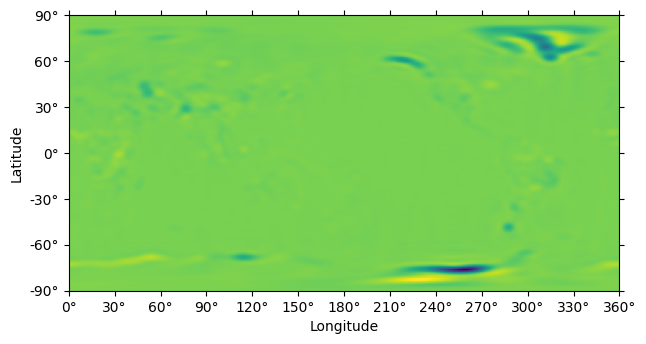

In [4]:
from src.utils import (
    load_complex_array_from_binary,
    harmonic_load_signal_trends_path,
)
from numpy import maximum, minimum
from pyshtools import SHCoeffs

trend_harmonics = load_complex_array_from_binary(
    name="2", path=harmonic_load_signal_trends_path
)
elastic_trend_harmonics = load_complex_array_from_binary(
    name="0", path=harmonic_load_signal_trends_path
)

c_lm = SHCoeffs.from_array(
    minimum(5.0, maximum(-5.0, trend_harmonics.real - elastic_trend_harmonics.real))
)


grid = c_lm.expand()
fig, ax = grid.plot(show=False)